In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Time Domain')

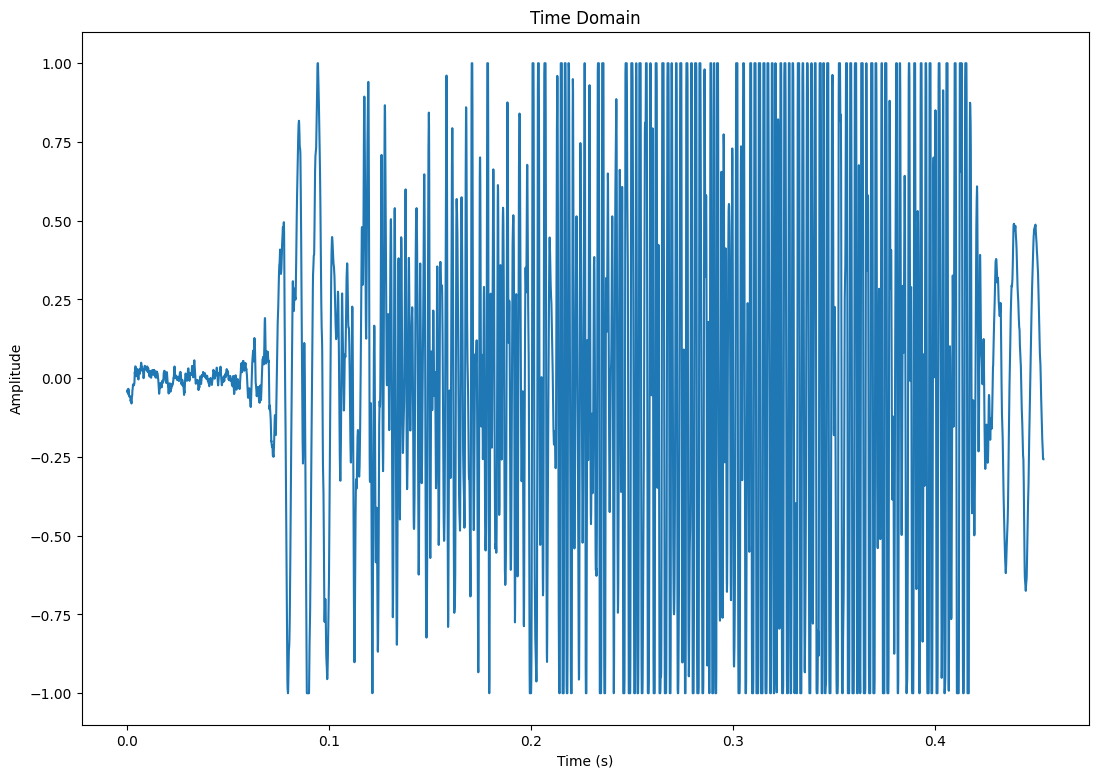

In [47]:
df=pd.read_csv('murmur3.DAT',sep='\s+',header=None)
df=pd.DataFrame(df) 
df = df[:5000]
x = df[df.columns[0]]
y = df[df.columns[1]]
fs = 11000 
i = np.arange(len(y)) / fs
plt.figure(figsize=((13,9)))
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time Domain")

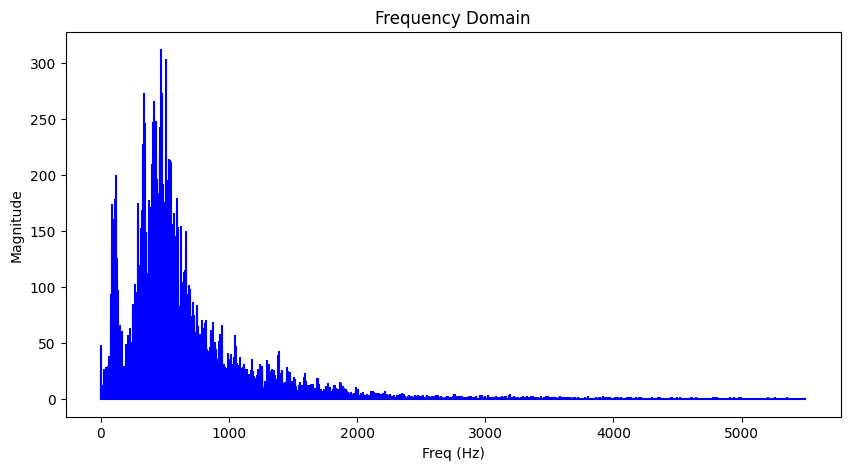

In [48]:
N = 5000 
n = np.arange(N)
k = n.reshape((N, 1))        
e = np.cos(2 * np.pi * k * n / N) - 1j * np.sin(2 * np.pi * k * n / N)

yy = np.dot(e,y)

yy = yy[:2500]
k = k[:2500]

plt.figure(figsize=((10,5)))
plt.stem(k*fs/5000,np.abs(yy), 'b', markerfmt=" ",
                              basefmt="-b")


plt.xlabel("Freq (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain")
plt.show()

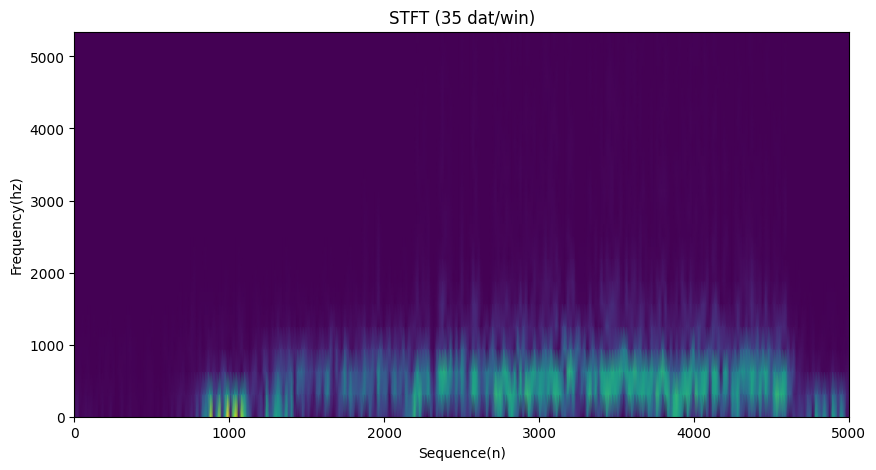

In [49]:

stft_window = 35
f, t, ys1 = signal.stft(y, fs, nperseg=stft_window)


plt.figure(figsize=((10,5)))
plt.pcolormesh((t * fs), f, np.abs(ys1), shading='gouraud')
plt.xlabel("Sequence(n)")
plt.ylabel("Frequency(hz)")
plt.title("STFT (35 dat/win)")
plt.show()

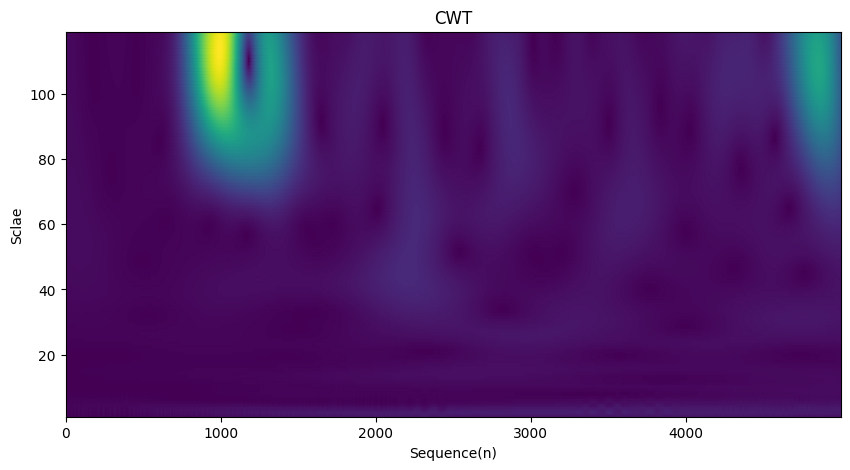

In [50]:
y = df[df.columns[1]]
freq = np.arange(1, 120)
w0 = 2 * np.pi * 0.849
scale = w0 * 11000 / (2 * freq * np.pi)
n = np.arange(N)
yc = signal.cwt(y, signal.morlet2, scale, dtype="complex128")

plt.figure(figsize=((10,5)))
plt.pcolormesh(n, freq, np.abs(yc), shading='gouraud')
plt.xlabel("Sequence(n)")
plt.ylabel("Sclae")
plt.title("CWT")
plt.show()
